# Calculation of Spiral Tip Properties
Tim Tyree<br>
2.25.2021

In [1]:
from lib.my_initialization import *
from lib import *
from lib.utils.merge_cloud_results import *

%load_ext autoreload
%autoreload 2

In [2]:
# from lib import compute_slope_vs_lag
# from lib.measure.compute_slope import compute_95CI_ols

In [3]:
# # from lib.viewer.PlotEMSD import *
# from lib.measure import compute_Dhat

In [4]:
# #make plots in darkmode
# import seaborn as sns
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# Computing Spiral Tip Properties for one trial

In [1]:
# file=search_for_file()
file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/all_traj_longer_than_1000.csv'

In [6]:
T_min=1000#ms
omit_time=150#ms
DS=0.025#cm/pixel
figsize=(17,4);fontsize=16
saving=True

# df=pd.read_csv(file)
# DT=compute_time_between_frames(df);print(f"DT={DT}")

# df=return_unwrapped_trajectory(df, width, height, sr, mem, dsdpixel, **kwargs)
# df=get_all_longer_than(df,DT,T_min=T_min)

# #count remaining individuals
# num_individuals=len(list(set(df.particle.values)));print(f"num_individuals={num_individuals}")
# emsd=compute_emsd(traj=df.copy(), DT=DT, omit_time=omit_time, printing=False,DS=DS)


In [7]:
# #save emsd
# savefn=f"emsd_longer_than_{T_min}.csv"
# os.chdir(savefig_folder)
# emsd.to_csv(savefn)#,index=False)
# os.path.abspath(savefn)
# # emsd

In [8]:
file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/emsd_longer_than_1000.csv'
DT=0.4
num_individuals=4064
emsd=pd.read_csv(file,index_col='lagt')
# lag_values,slope_values=compute_slope_vs_lag(emsd,T_min,omit_time,window_width=50,stepsize=10)

In [9]:
savefig_folder=os.path.dirname(file)#os.path.join(nb_dir,'Figures/msd_loglog')
savefig_fn=os.path.basename(file).replace('.csv','.png')#f'logMSD_vs_loglag_Tmin_{T_min/10**3:.1f}_N_{trials_considered}_mni_{min_num_individuals}.png'

saved figure in 
	emsd_longer_than_1000.png


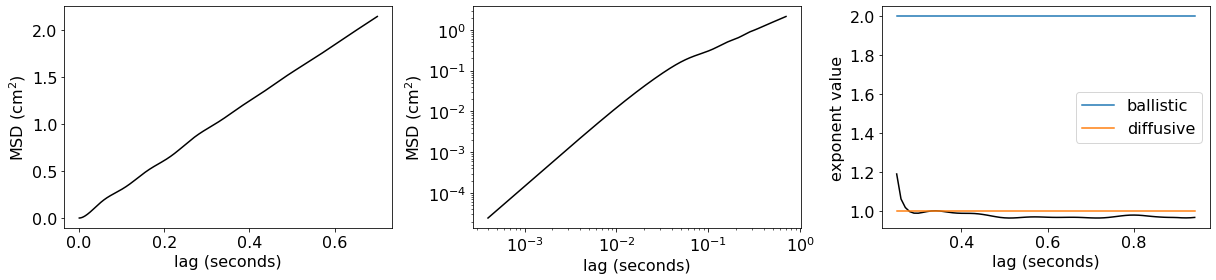

In [10]:

fig,axs=plt.subplots(ncols=3,figsize=figsize)
plot_emsd(axs[0],emsd,label='_Hidden', color='black',alpha=1.)
format_plot_emsd(axs[0],use_loglog=False,fontsize=fontsize)

plot_emsd(axs[1],emsd,label='_Hidden', color='black',alpha=1.)
format_plot_emsd(axs[1],use_loglog=True,fontsize=fontsize)

lag_values,slope_values=compute_slope_vs_lag(emsd,T_min,omit_time,window_width=500,stepsize=10)
plot_slope_of_emsd(axs[2],lag_values,slope_values,label='_Hidden', color='black', alpha=1.,plot_reference_lines=True)

format_slope_of_emsd(axs[2],fontsize=fontsize,use_loglog=False)

if not saving:
    plt.tight_layout()
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

In [11]:
#compute and print v_rms and D
# compute diffusion coefficient and rms velocity of spiral tips
v_rms,Delta_v_rms,_,_,Rsquared_v,_=compute_v_rms(emsd,num_points=8)
Dhat,Delta_Dhat,tau_min,tau_max,Rsquared_D,delta_tau=compute_Dhat(emsd,tau_min=300,window_width=500)

# Dhat,Delta_Dhat,tau_min,tau_max,Rsquared_D,delta_tau=compute_Dhat(emsd,tau_min=200,MSD_thresh=.2,max_lagtime=50)
print(f"make sure the right DT scale was used!")
print(f"make sure to record in spreadsheet!")
print(f"time window for D was from {tau_min:.0f} to {tau_max:.0f} ms.")
print(f"D = {Dhat} +- {Delta_Dhat} cm^2/s... Rsq={Rsquared_D}")
print(f"v_rms = {v_rms} +- {Delta_v_rms} cm/s... Rsq={Rsquared_v}")


make sure the right DT scale was used!
make sure to record in spreadsheet!
time window for D was from 300 to 800 ms.
D = 0.7493536150894692 +- 0.00032435236477258586 cm^2/s... Rsq=0.9999531639575268
v_rms = 11.681972592374715 +- 0.06724019170027333 cm/s... Rsq=0.9999503070021935


In [12]:
#make pd.DataFrame that can be copy/pasted to a spreadsheet
df_output=pd.DataFrame({
    'exponent_final':slope_values[-1],
    'exponent_500':slope_values[lag_values==.5][0],
    "Dhat":[Dhat],
    "Delta_Dhat":[Delta_Dhat],
    "Rsquared_D":[Rsquared_D],
    "v_rms":v_rms,
    "Delta_v_rms":Delta_v_rms,
    "Rsquared_v":Rsquared_v,
    "num_individuals":num_individuals,
    "diffCoef":0.0005,
    'area':25,
    'model':'param_set_8'
})
print(num_individuals)
df_output

4064


,exponent_final,exponent_500,Dhat,Delta_Dhat,Rsquared_D,v_rms,Delta_v_rms,Rsquared_v,num_individuals,diffCoef,area,model
0,0.968574,0.9664,0.749354,0.000324,0.999953,11.681973,0.06724,0.99995,4064,0.0005,25,param_set_8


#  Reproducibility with large number of independent trials

In [14]:
# file=search_for_file()
file="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.4/longest_unwrapped_trajectories.csv"

In [15]:
T_min=1000#ms
omit_time=150#ms
DS=0.025#cm/pixel
figsize=(17,4);fontsize=16
saving=True

df=pd.read_csv(file)
DT=compute_time_between_frames(df);print(f"DT={DT}")

# df=return_unwrapped_trajectory(df, width, height, sr, mem, dsdpixel, **kwargs)
df=get_all_longer_than(df,DT,T_min=T_min)

#count remaining individuals
num_individuals=len(list(set(df.particle.values)));print(f"num_individuals={num_individuals}")
emsd=compute_emsd(traj=df.copy(), DT=DT, omit_time=omit_time, printing=False,DS=DS)


DT=1.0
num_individuals=156


In [16]:
savefig_folder=os.path.dirname(file)#os.path.join(nb_dir,'Figures/msd_loglog')
savefig_fn=os.path.basename(file).replace('.csv','.png')#f'logMSD_vs_loglag_Tmin_{T_min/10**3:.1f}_N_{trials_considered}_mni_{min_num_individuals}.png'

In [17]:
#save emsd
savefn=f"emsd_longer_than_{T_min}.csv"
os.chdir(savefig_folder)
emsd.to_csv(savefn)#,index=False)
os.path.abspath(savefn)

'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.4/emsd_longer_than_1000.csv'

In [19]:
# file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.4/emsd_longer_than_1000.csv'
# DT=1.0
# num_individuals=156
# emsd=pd.read_csv(file,index_col='lagt')
# # lag_values,slope_values=compute_slope_vs_lag(emsd,T_min,omit_time,window_width=50,stepsize=10)
# emsd.iloc[-1]

saved figure in 
	longest_unwrapped_trajectories.png


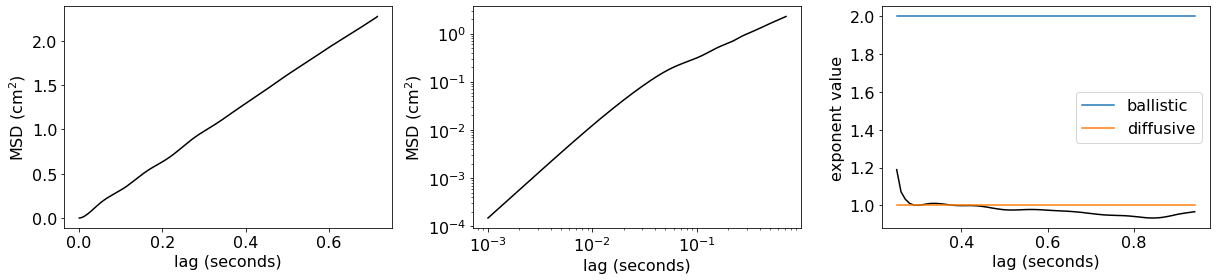

In [20]:

fig,axs=plt.subplots(ncols=3,figsize=figsize)
plot_emsd(axs[0],emsd,label='_Hidden', color='black',alpha=1.)
format_plot_emsd(axs[0],use_loglog=False,fontsize=fontsize)

plot_emsd(axs[1],emsd,label='_Hidden', color='black',alpha=1.)
format_plot_emsd(axs[1],use_loglog=True,fontsize=fontsize)

lag_values,slope_values=compute_slope_vs_lag(emsd,T_min,omit_time,window_width=500,stepsize=10)
plot_slope_of_emsd(axs[2],lag_values,slope_values,label='_Hidden', color='black', alpha=1.,plot_reference_lines=True)

format_slope_of_emsd(axs[2],fontsize=fontsize,use_loglog=False)

if not saving:
    plt.tight_layout()
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

In [21]:
slope_values[-1]
# slope_values[lag_values==.5][0]


0.9662999306673726

In [22]:
#compute and print v_rms and D
# compute diffusion coefficient and rms velocity of spiral tips
v_rms,Delta_v_rms,_,_,Rsquared_v,_=compute_v_rms(emsd,num_points=8)
Dhat,Delta_Dhat,tau_min,tau_max,Rsquared_D,delta_tau=compute_Dhat(emsd,tau_min=300,window_width=500)

# Dhat,Delta_Dhat,tau_min,tau_max,Rsquared_D,delta_tau=compute_Dhat(emsd,tau_min=200,MSD_thresh=.2,max_lagtime=50)
print(f"make sure the right DT scale was used!")
print(f"make sure to record in spreadsheet!")
print(f"time window for D was from {tau_min:.0f} to {tau_max:.0f} ms.")
print(f"D = {Dhat} +- {Delta_Dhat} cm^2/s... Rsq={Rsquared_D}")
print(f"v_rms = {v_rms} +- {Delta_v_rms} cm/s... Rsq={Rsquared_v}")


make sure the right DT scale was used!
make sure to record in spreadsheet!
time window for D was from 300 to 800 ms.
D = 0.7835859198229775 +- 0.0012118563085177095 cm^2/s... Rsq=0.9997525076036896
v_rms = 11.217029621223183 +- 0.1437880740088317 cm/s... Rsq=0.9997535809794501


In [23]:
#make pd.DataFrame that can be copy/pasted to a spreadsheet
df_output=pd.DataFrame({
    'exponent_final':slope_values[-1],
    'exponent_500':slope_values[lag_values==.5][0],
    "Dhat":[Dhat],
    "Delta_Dhat":[Delta_Dhat],
    "Rsquared_D":[Rsquared_D],
    "v_rms":v_rms,
    "Delta_v_rms":Delta_v_rms,
    "Rsquared_v":Rsquared_v,
    "num_individuals":num_individuals,
    "diffCoef":0.0005,
    'area':25,
    'model':'param_set_8'
})
print(num_individuals)
df_output

156


,exponent_final,exponent_500,Dhat,Delta_Dhat,Rsquared_D,v_rms,Delta_v_rms,Rsquared_v,num_individuals,diffCoef,area,model
0,0.9663,0.976476,0.783586,0.001212,0.999753,11.21703,0.143788,0.999754,156,0.0005,25,param_set_8


# TODO: Compute results versus diffusion coefficient of voltage


# TODO: Compute results for each trial in a folder

In [73]:
# file=search_for_file()

File: /home/timothytyree/Documents/GitHub/care_worker/python/osg_output/Log/job.error.8250560.0


In [33]:
log_folder='/home/timothytyree/Documents/GitHub/care_worker/python/osg_output/Log/'
# log_folder="/Users/timothytyree/Documents/GitHub/care_worker/python/Log"
os.chdir(log_folder)
input_fn_lst=[os.path.abspath(fn) for fn in os.listdir() if fn.find('job.out.')!=-1]
print(f"the number of output files in folder is {len(input_fn_lst)}.")

the number of output files in folder is 2712.


In [46]:
#compute the list of all summarizing results
DS=0.025
df_output_lst=[]
for input_fn in input_fn_lst:
    line_no,dict_params=parse_input_params(input_fn)
    # print(dict_params)

    try:
        num_individuals=eval(dict_params['N'])
    except KeyError as e:
        num_individuals=0

    if num_individuals>0:
        emsd=pd.read_csv(input_fn,header=line_no+1,delim_whitespace=True)
    else:
#         print(f'no emsd found in {os.path.basename(input_fn)}')
        emsd=None

    if emsd is not None:
        # def summarize_trial(emsd,dict_params):
        area=(eval(dict_params['L'])*DS)**2#cm^2
        lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=1000,omit_time=150,window_width=500,stepsize=10)
        v_rms,Delta_v_rms,_,_,Rsquared_v,_=compute_v_rms(emsd,num_points=8)
        Dhat,Delta_Dhat,tau_min,tau_max,Rsquared_D,delta_tau=compute_Dhat(emsd,tau_min=300,window_width=500)
        df_output=pd.DataFrame({
            'exponent_final':slope_values[-1],
            'exponent_500':slope_values[lag_values==.5][0],
            "Dhat":[Dhat],
            "Delta_Dhat":[Delta_Dhat],
            "Rsquared_D":[Rsquared_D],
            "v_rms":v_rms,
            "Delta_v_rms":Delta_v_rms,
            "Rsquared_v":Rsquared_v,
            "num_individuals":num_individuals,
            "diffCoef":eval(dict_params['diffCoef']),
            'area':area,
            'model':'param_set_8'
        })
    #     print(num_individuals)
        df_output_lst.append(df_output)
beep(5)

0

In [48]:
print(f"{len(df_output_lst)} distinct trials were successfully recorded.")
df=pd.concat(df_output_lst)
df.head()


1232

In [52]:
#save df as csv in care
save_folder=os.path.join(nb_dir,'Data/cloud_results')
os.chdir(save_folder)
save_fn='cloud_results_fk_versus_diffCoef_versus_area.csv'
df.to_csv(save_fn)

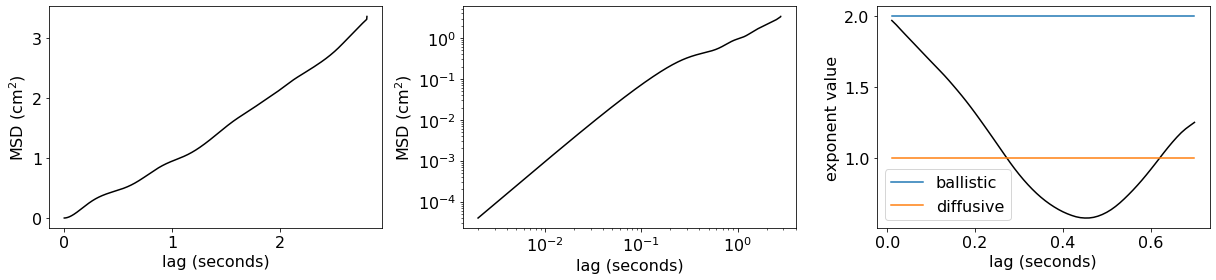

In [47]:
#plot emsd and exponent for given pd.DataFrame instance named emsd
saving=False
figsize=(17,4);fontsize=16
fig,axs=plt.subplots(ncols=3,figsize=figsize)
plot_emsd(axs[0],emsd,label='_Hidden', color='black',alpha=1.)
format_plot_emsd(axs[0],use_loglog=False,fontsize=fontsize)

plot_emsd(axs[1],emsd,label='_Hidden', color='black',alpha=1.)
format_plot_emsd(axs[1],use_loglog=True,fontsize=fontsize)

lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=1000,omit_time=150,window_width=20,stepsize=10)
plot_slope_of_emsd(axs[2],lag_values,slope_values,label='_Hidden', color='black', alpha=1.,plot_reference_lines=True)
format_slope_of_emsd(axs[2],fontsize=fontsize,use_loglog=False)

if not saving:
    plt.tight_layout()
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

# Visualize key features from distributed survey.

In [54]:
data_dir=f'{nb_dir}/Data/cloud_results/cloud_results_fk_versus_diffCoef_versus_area.csv'

#TODO: import merged cloud results
#TODO: make DVmem field that has the correct values

'/home/timothytyree/Documents/GitHub/care/notebooks/Data/cloud_results/cloud_results_fk_versus_diffCoef_versus_area.csv'

In [50]:
#TODO: plot on 1 axis, the exponent traces for area fixed and diffusion coefficient varying
#TODO: repeat ^that for several fixed areas
#TODO: plot on 1 axis, the exponent traces for area varying and diffusion coefficient fixed
#TODO: repeat ^that for several fixed diffusion coefficients

#TODO: query the log_folder for emsd with inputs satisfying a condition.
#TODO: plot emsd versus lag and expoenent at few corners using the viewer functions I already made
#TODO: make a phase diagram of some interesting feature distinguishing the corners (for ^that)